Zadanie 9

### Patryk Biegun Andrzej Głowacki



In [2]:
%%writefile z9.mod

/* Deklaracja zmiennych */
var x{i in 0..6} integer >= 0; /* Ilość każdej cyfry w liczbie */
var y{i in 0..6, j in 0..6} binary; /* 1 jeśli cyfra i znajduje się na pozycji j, 0 w przeciwnym przypadku */
var wynik, integer; /* Zmienna do przechowywania wyniku jako liczby całkowitej */

/* Ograniczenie sumy cyfr do 5 */
s.t. sum_constraint: sum{i in 0..6} x[i] = 7;

/* Ograniczenie, aby każda pozycja miała dokładnie jedną cyfrę */
s.t. pos_constraint{j in 0..6}: sum{i in 0..6} y[i,j] = 1;

/* Ograniczenia przypisujące ilość każdej cyfry */
s.t. assign{i in 0..6}: x[i] = sum{j in 0..6} y[i,j];

/* Ograniczenie na ilość cyfr na danej pozycji */
s.t. digit{i in 0..6, j in 0..6}: x[j] >= i * y[i,j];

/* Budowanie wynikowej liczby */
s.t. build_result{j in 0..6}: wynik = sum{i in 0..6} x[i] * 10^(6-i);

/* Funkcja celu - minimalizujemy sumę, aby uzyskać jak najniższą liczbę */
minimize obj: sum{i in 0..6} x[i];

/* Rozwiązanie */
solve;

/* Wyświetlenie wyników */
printf "Wynikowa 7-cyfrowa liczba autobiograficzna: %d\n", wynik;

data;
end;

Overwriting z9.mod


Szukanie 7 cyfrowej liczby auto graficznej przebiegło bez problemu ale kiedy próbojemy przebić się przez te barierę nasz kod przestaje działać.
Matematycznie jest on poprawny i wyszkuje zgodnie z wytycznymi. Problemem jest tutaj chyba rozmiar inta który wynosi 2^31 czyli około dwa miliard
y.

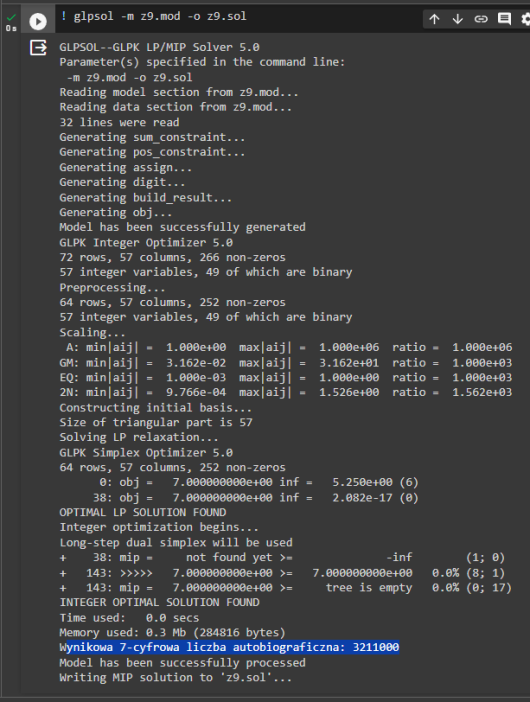

In [ ]:
%%writefile z9.mod


/* Deklaracja zmiennych */
var x{i in 0..4} integer >= 0; /* Ilość każdej cyfry w liczbie */
var y{i in 0..4, j in 0..4} binary; /* 1 jeśli cyfra i znajduje się na pozycji j, 0 w przeciwnym przypadku */
var wynik, integer; /* Zmienna do przechowywania wyniku jako liczby całkowitej */

/* Ograniczenie sumy cyfr do 5 */
s.t. sum_constraint: sum{i in 0..4} x[i] = 5;

/* Ograniczenie, aby każda pozycja miała dokładnie jedną cyfrę */
s.t. pos_constraint{j in 0..4}: sum{i in 0..4} y[i,j] = 1;

/* Ograniczenia przypisujące ilość każdej cyfry */
s.t. assign{i in 0..4}: x[i] = sum{j in 0..4} y[i,j];

/* Ograniczenie na ilość cyfr na danej pozycji */
s.t. digit{i in 0..4, j in 0..4}: x[j] >= i * y[i,j];

/* Budowanie wynikowej liczby */
s.t. build_result{j in 0..4}: wynik = sum{i in 0..4} x[i] * 10^(4-i);

/* Funkcja celu - minimalizujemy sumę, aby uzyskać jak najniższą liczbę */
minimize obj: sum{i in 0..4} x[i];

/* Rozwiązanie */
solve;

/* Wyświetlenie wyników */
printf "Wynikowa 5-cyfrowa liczba autobiograficzna: %d\n", wynik;

data;
end;

Tutaj wersja 5 cyfrowa, przetestowaliśmy ten kod dla każdej liczby autobiograficznej i zawsze potrafiła znaleźć każdą do pewnego limitu.


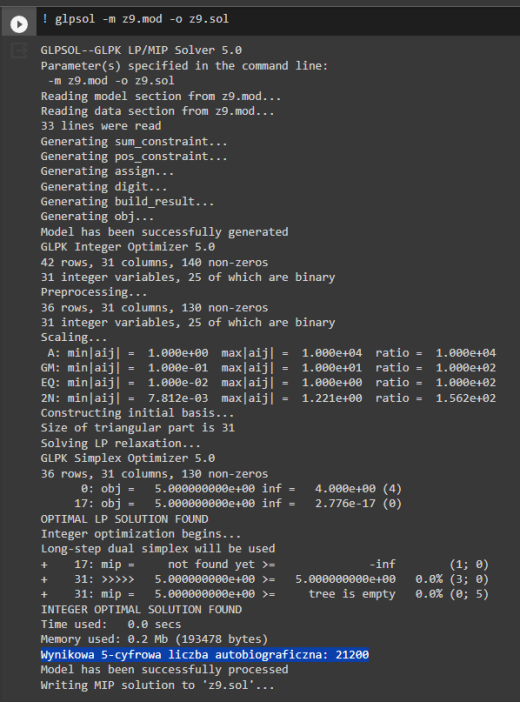

Model ten ma na celu znalezienie 10-cyfrowej liczby, która jest "autobiograficzną", czyli taka, że każda cyfra w tej liczbie odpowiada ilości wystąpień danej cyfry w samej liczbie. W niniejszym sprawozdaniu przeanalizujemy każdy fragment kodu, opiszemy jego znaczenie i rolę w kontekście rozwiązywanego problemu.

**Analiza kodu:**

Deklaracja zmiennych:
Linie 1 i 2 zawierają deklaracje zmiennych x i y. x reprezentuje ilość każdej cyfry w wynikowej liczbie, a y określa, czy dana cyfra znajduje się na danej pozycji w wynikowej liczbie.

**Ograniczenia (constraints):**

Linie 4-8 definiują różne ograniczenia matematyczne, które model musi spełnić:
sum_constraint wymusza, że suma ilości każdej cyfry w wynikowej liczbie musi wynosić 10.
pos_constraint zapewnia, że na każdej pozycji w wynikowej liczbie znajduje się dokładnie jedna cyfra.
assign przypisuje ilość każdej cyfry w wynikowej liczbie na podstawie zmiennych y.
digit określa, że ilość cyfr na danej pozycji musi być większa lub równa i tylko wtedy, gdy y[i,j] jest równe 1.
build_result buduje wynikową liczbę na podstawie zmiennych x i ich pozycji w liczbie.

 **Funkcja celu (objective function):**
Linia 10 definiuje funkcję celu obj, która ma na celu minimalizację sumy ilości każdej cyfry x[i] w wynikowej liczbie, aby uzyskać jak najniższą liczbę.

***Rozwiązanie:***
Linia 12 uruchamia rozwiązanie modelu matematycznego, aby znaleźć optymalne wartości zmiennych.

***Wyświetlanie wyników:***
Linia 14 używa funkcji printf do wyświetlenia wyniku, który jest obliczoną 10-cyfrową liczbą autobiograficzną.



 ***Rozwiązania przedstawione w kodzie***

    
    
**Deklaracja zmiennych:**
Zmienne x i y są kluczowe dla tego modelu. x reprezentuje ilość wystąpień każdej cyfry (od 0 do 6) w wynikowej 10-cyfrowej liczbie. To oznacza, że dla każdej cyfry (od 0 do 6) mamy zmienną x[i], która przechowuje liczbę wystąpień tej cyfry w wyniku.
Zmienna y jest macierzą binarną o rozmiarze 10x10, gdzie y[i,j] ma wartość 1, jeśli cyfra i znajduje się na pozycji j w wynikowej liczbie, a 0 w przeciwnym przypadku.

**Ograniczenia (constraints):**
sum_constraint: To ograniczenie mówi, że suma ilości każdej cyfry x[i] w wynikowej liczbie musi wynosić 10. W ten sposób zapewniamy, że ostateczna liczba będzie miała 10 cyfr.

pos_constraint: To ograniczenie gwarantuje, że na każdej pozycji w wynikowej liczbie znajduje się dokładnie jedna cyfra. To sprawia, że liczba nie będzie miała powtórzonych cyfr na różnych pozycjach.

assign: To ograniczenie przypisuje ilość każdej cyfry w wynikowej liczbie na podstawie zmiennych y. Dzięki temu mamy kontrolę nad tym, gdzie każda cyfra jest umieszczana w wyniku.

digit: To ograniczenie określa, że ilość cyfr na danej pozycji musi być większa lub równa i tylko wtedy, gdy y[i,j] jest równe 1. Dzięki temu unikamy sytuacji, w której na danej pozycji jest zbyt dużo cyfr.

**Funkcja celu (objective function):**
Funkcja celu obj minimalizuje sumę ilości każdej cyfry x[i] w wynikowej liczbie. Oznacza to, że model dąży do znalezienia takiej liczby, w której każda cyfra jest możliwie jak najmniej razy, spełniając jednocześnie wszystkie ograniczenia.

**Rozwiązanie:**
Po zdefiniowaniu zmiennych, ograniczeń i funkcji celu, linia solve; inicjuje proces rozwiązania modelu matematycznego. Model jest zoptymalizowany w celu znalezienia najlepszych wartości zmiennych x i y, które spełniają wszystkie warunki i minimalizują funkcję celu.

**Wyświetlanie wyników:**
Ostatecznie, po znalezieniu optymalnych rozwiązań, linia printf wyświetla wynik w postaci obliczonej 10-cyfrowej liczby autobiograficznej.


